# Test a Perceptual Phenomenon

### By Sargam Shah

#### Project Aim:

Use descriptive statistics and a statistical test to analyze the Stroop effect, a classic result of experimental psychology. Give your readers a good intuition for the data and use statistical inference to draw a conclusion based on the results.

#### Background:

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

### Analysis

Let's take a look at the dataset provided.



In [3]:
#Place dataset in current working directory
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

path = r'C:/Users/Sargam/Desktop/udacity/stroop/stroopdata.csv'
dataFrame = pd.read_csv(path)
dataFrame['ParticipantID'] = dataFrame.index +1 #Add Participant ID 
dataFrame

,Congruent,Incongruent,ParticipantID
0,12.079,19.278,1
1,16.791,18.741,2
2,9.564,21.214,3
3,8.630,15.687,4
4,14.669,22.803,5
5,12.238,20.878,6
6,14.692,24.572,7
7,8.987,17.394,8
8,9.401,20.762,9
9,14.480,26.282,10


### What are the independent and dependent variables?

Independent variable: Words List, either from congruent or incongruent list.
Dependent variable: response time (in seconds) from 24 participants.

### What is an appropriate set of hypotheses for this task? What kind of statistical test one can perform? 

The **dependent samples two-tailed t-test** is the appropriate methods for this tasks for these following reasons:

The dataset does not include population μ and σ. Therefore, we cannot conduct a z-test. 

We can compare two means from 2 samples for pre-test period and post-test period, which is the most appropriate task for dependent sample t-Test.

We did not randomize 2 samples and gave them different treatment. In short, we do not pay attention to Between-subject design and carry-on effect but we focus on Within-subject design.

We are not drawing any conclusion whether response time is faster or slower than the null hypothesis but just recognize there is a different.

**Null Hypothesis: **

Ho: There is no difference in population means of participant's response time under incongruent and congruent scenarios, which can be mathematically represented as 
                                μC = μI , 
where μ is the mathematical symbol for mean and μC is the population mean of congruent words and μI is the population mean of incongruent words. 

**Alternative Hypothesis: **

Ha: There is significant difference in populaiton means the participant's response time in viewing congruent words vs incongruent words, regardless the response time is faster or slower than the pre-test period, which can be mathematically represented as

                                μC < μI, μC > μI , μC ≠ μI,  
where μ is the mean and μC is the population mean of congruent words and μI is the population mean of incongruent words.
 


### What are some descriptive statistics regarding this dataset?   



In [2]:
#Separate congruent and incongruent data
congruent = dataFrame['Congruent'] 
incongruent = dataFrame['Incongruent']

In [10]:
#Set up coding for all measurement
#Central tendency
congruent_mean = round(congruent.mean(),2)
incongruent_mean = round(incongruent.mean(),2)
congruent_median = round(congruent.median(),2)
incongruent_median = round(incongruent.median(),2)
#Variability 
congruent_std = round(congruent.std(),2)
incongruent_std = round(incongruent.std(),2)

Central tendency:

In [11]:
congruent_mean

14.05

In [12]:
incongruent_mean

22.02

In [13]:
congruent_median

14.36

In [14]:
incongruent_median

21.02

Variability:

In [16]:
congruent_std

3.56

In [17]:
incongruent_std

4.8

Summary:

| Measurement        | Congruent           | Incongruent  |
| ------------- |:-------------:| -----:|
            | Mean    | 14.05 | 22.02 |
        | Mediafdn      | 14.36      |  21.02 |
| Standard Deviation | 3.56      |   4.8 |


### How would one or two visualizations that show the distribution of the sample data look like?


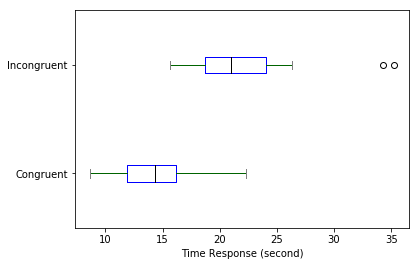

In [18]:

dataFrame.plot(x = 'Participant ID', 
          kind = 'box', 
          vert = False,
          color = dict(boxes = 'Blue', 
                       whiskers = 'DarkGreen', 
                       medians = 'Black',
                       caps = 'Gray')
         ).set_xlabel('Time Response (second)')
plt.show()

Populating the interactive namespace from numpy and matplotlib


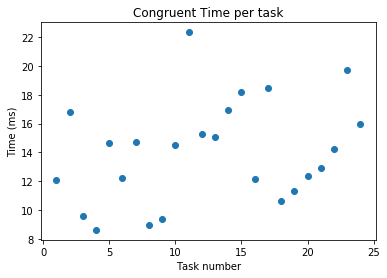

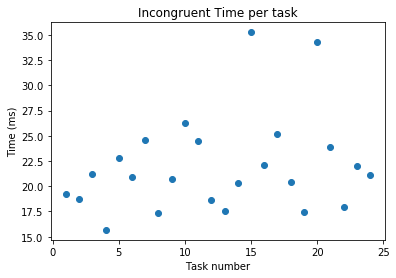

In [5]:
%pylab inline

import matplotlib.pyplot as plt

meansByChopstickLength = dataFrame.groupby('Congruent').mean().reset_index()

plt.scatter(x=meansByChopstickLength['ParticipantID'], y=meansByChopstickLength['Congruent'])
            # title="")
plt.xlabel("Task number")
plt.ylabel("Time (ms)")
plt.title("Congruent Time per task")
plt.show()


plt.scatter(x=meansByChopstickLength['ParticipantID'], y=meansByChopstickLength['Incongruent'])
            # title="")
plt.xlabel("Task number")
plt.ylabel("Time (ms)")
plt.title("Incongruent Time per task")
plt.show()

Observation: 
Visually speaking, the box plot shows that the mean of incongruent response time may not be within the t-critical from congruent response time. Also, we can also see few outlier from "Incongruent" that could indicate the response time is significant higher if we take more sample sizes.But in order to firmly confirm, we need to conduct proper statistical test as listed below.

### Did you perform the statistical test and report your results? What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [19]:
#Calculate Point Estimate 
point_estimate = round((incongruent_mean - congruent_mean),2)
point_estimate

7.97

Here, Alpha = 0.1, frequency of dataset = 23, t critical value is +1.714 and -1.714 with 90% confidence interval

In [24]:
#Calculate Standard Deviation Difference between Congruent & Incongruent using NumPy package
dataFrame['D'] = dataFrame['Incongruent'] - dataFrame['Congruent']
dataFrame['D']
s = round((dataFrame['D'].std()),3)
s 

4.865

In [25]:
#Calculate t-statistic with n = 24, point estimate = 7.97 and standard deviation
t = round(point_estimate/(s/math.sqrt(24)),3)
t

8.026

t-statistic = 8.027 > t-critical = 1.714 by a significant amount. Therefore, we reject the null hypothesis that there is no significant difference between response time in these 2 tests. In fact, it maybe took much longer and completely out of the t-table.

### What do you think is responsible for the effects observed?

Intuitively speaking, this result is align with common sense that people take longer time to process information that contradict to their existed perception toward the subject.

The brain has an image association between the shape of the word and the colour. When there is a mismatch, additional time is necessary for the prefrontal cortex to process the information and decide on its meaning.
A similar effect would likely be observed if the participants were shown words of the correct colour but the wrong text. My hunch, however, is that the difference would be less pronounced as I’d expect the visual colour representation to be more ingrained in the brain that word shape associations.